In [5]:
import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [1]:
from sklearn.datasets import load_iris
iris_datasets = load_iris()

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_datasets['data'], iris_datasets['target'], random_state=0)

In [3]:
iris_datasets.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_datasets.feature_names)

/home/skyrover/repository/ml/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


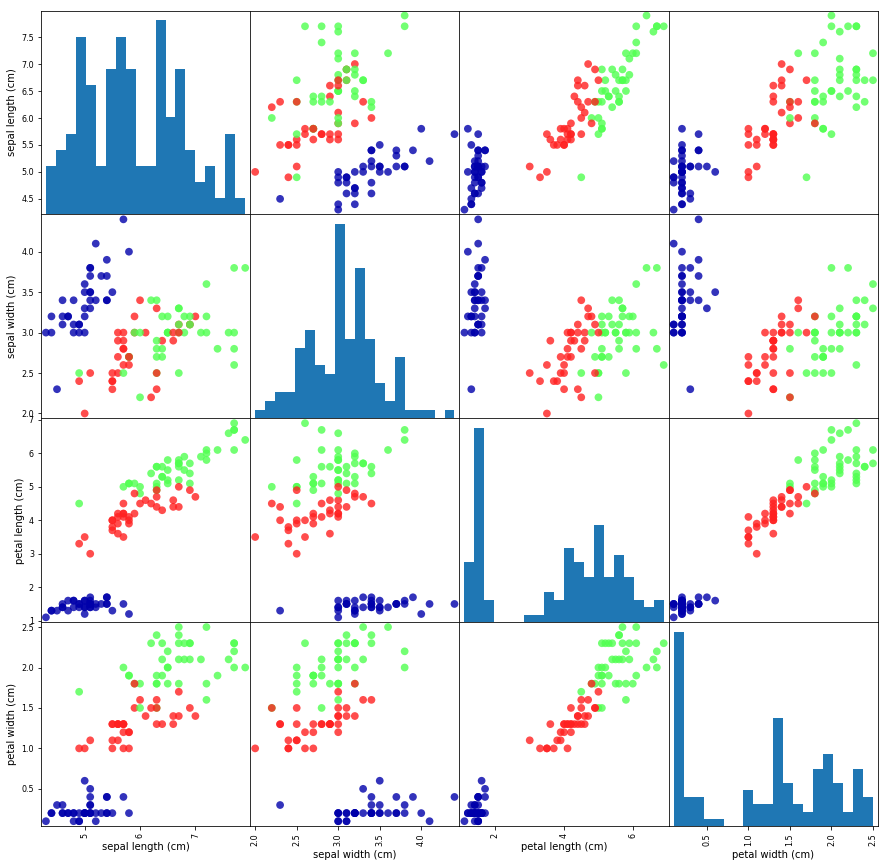

In [8]:
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=0.8, cmap=mglearn.cm3)

In [9]:
y_train  # 分类标签

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

In [63]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
knn = KNeighborsClassifier(n_neighbors=1)

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [12]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])

In [13]:
prediction = knn.predict(X_new)

In [15]:
prediction, iris_datasets['target_names'][prediction]

(array([0]), array(['setosa'], dtype='<U10'))

In [16]:
y_pred = knn.predict(X_test)

In [17]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [18]:
knn.score(X_test, y_test)

0.9736842105263158

## 监督学习算法

In [40]:
X, y = mglearn.datasets.make_forge()

Text(0,0.5,'Second feature')

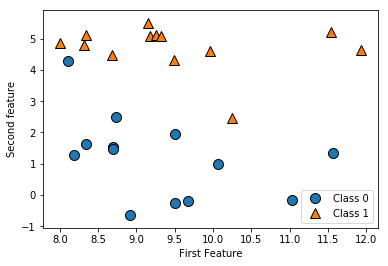

In [41]:
# X两个特征，26行，y代表其标签，一个分类问题
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
import matplotlib.pyplot as plt
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second feature")

In [43]:
# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.8571428571428571

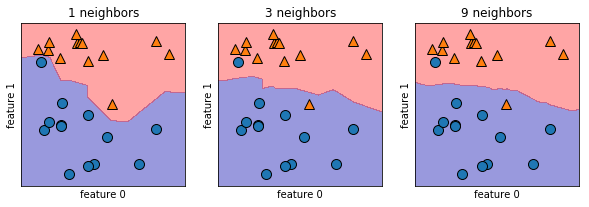

In [44]:
# 选择近邻K越小，模型越复杂，K越大，模型越简单，考虑极端情况，K为所有点，则所有预测结果都一样
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

Text(0,0.5,'target')

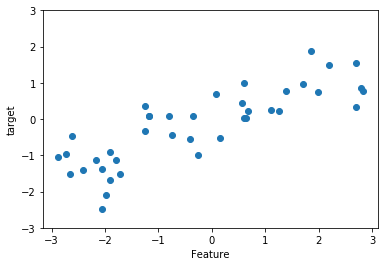

In [57]:
# X只有一个特征，y是一个连续的目标变量，一个回归问题
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('target')

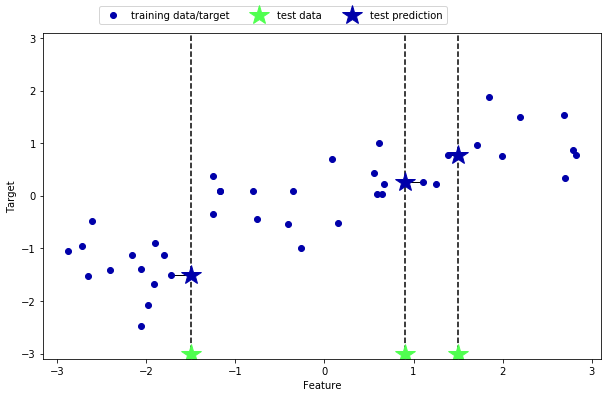

In [58]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

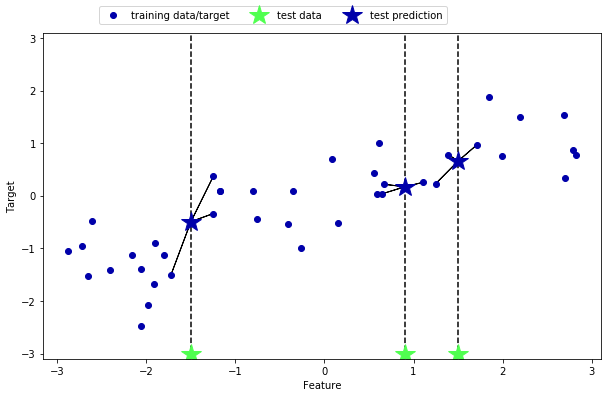

In [59]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [65]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [66]:
# 回归问题，用R2分数，决定系数来评估模型，回归模型的优度度量
reg.score(X_test, y_test)

0.8344172446249604

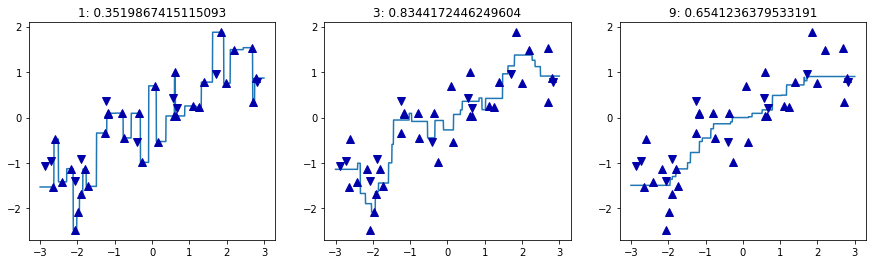

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(0), markersize=8)
    ax.set_title("{}: {}".format(n_neighbors, reg.score(X_test, y_test)))

In [45]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# 总共有30个特征， 一个分类问题
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

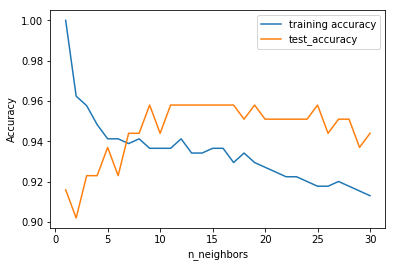

In [48]:
# 更简单的模型在训练集上精度比较低，但是在测试集上会获得比较高的精度，模型复杂
# 应该有一个折中点，这里没有显示出来，使用K=31的时候，可以看出来，在K=10的时候，精度最高，在95%，随着K增大，精度在变低
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 31)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [11]:
from sklearn.datasets import load_boston
# 13个特征，回归问题
boston = load_boston()
X, y = mglearn.datasets.load_extended_boston()

In [31]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [33]:
X.shape

(506, 104)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.952352643686424, 0.6057754892935732)

In [14]:
# 岭回归 ridgt 复杂度更小的模型意味着在训练集上的性能更差，但是泛化性能更好
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.8860578560395833, 0.7527139600306945)

In [20]:
# 通过指定alpha系数来在模型简单性和训练集性能上做出权衡，
# 增大alpha会让模型系数更趋于0，这样每个特征对输出的影响就会尽可能小，这样会降低训练集性能，提高泛化性能
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.9285782082010733, 0.771793368884479)

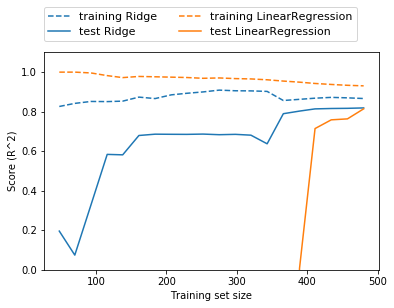

In [21]:
mglearn.plots.plot_ridge_n_samples()
# 如果有更多的训练数据，正则化就没那么重要，并且岭回归和线性回归降具有相同性能
# 如果添加更多数据，模型将更加难以过拟合或者记住所有数据

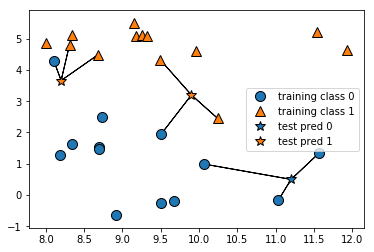

In [38]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

### 线性模型

w[0]: 0.393906  b: -0.031804


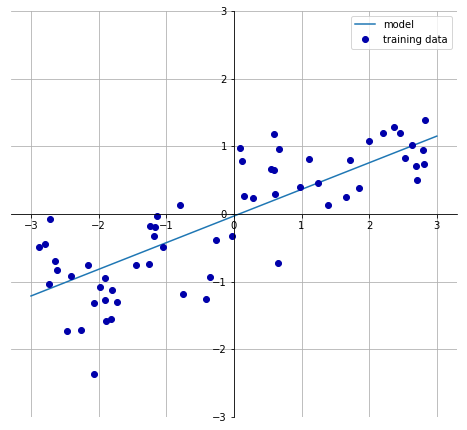

In [4]:
# 利用输入特征的线性函数进行预测 输入特征的加权求和
import mglearn
mglearn.plots.plot_linear_regression_wave()

In [6]:
# 如果特征数量大于训练数据点的数量，任何目标y都可以在训练集上用线性函数完美拟合
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
lr.coef_, lr.intercept_

(array([0.44153666]), -0.01711124414733381)

In [8]:
# 分数相当接近，说明可能存在欠拟合，模型太简单，一般过拟合是训练精度很高，但是测试精度不高，泛化精度
lr.score(X_train, y_train), lr.score(X_test, y_test)
# 训练集和测试集之间的性能差异是过拟合的明显标志，线性回归无法控制模型复杂度

(0.6592061059587275, 0.6932519118518162)